# Project: Write Data Science Blog Post
### A data analysis using Stack Overflow's developer survey data from 2021

## 1. Business Understanding

Mental disorders have detrimental consequences on developers’ mental well-being, the software development process, and the produced artifacts. However, little is known about causes of mental illness. Using Stack Overflow's developer survey data from 2021, this project is going to explore following questions.

* **Question 1**: Which mental health disorders are prevalent among programmers?

* **Question 2**: Is mental health correlated with employment?

* **Question 3**: Is mental health correlated with salary?

## 2.  Data Understanding

In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('survey_results_public.csv')

In [4]:
# check data shape
print('Stack Overflow\'s developer survey data 2021 contains {} questions and {} observations.'.format(df.shape[0], df.shape[1]))
# check missing value
df.isnull().sum()/df.shape[0]


Stack Overflow's developer survey data 2021 contains 83439 questions and 48 observations.


ResponseId                      0.000000
MainBranch                      0.000000
Employment                      0.001390
Country                         0.000000
US_State                        0.821187
UK_Country                      0.947051
EdLevel                         0.003751
Age1stCode                      0.002349
LearnCode                       0.005705
YearsCode                       0.021549
YearsCodePro                    0.266338
DevType                         0.203202
OrgSize                         0.272211
Currency                        0.267968
CompTotal                       0.434521
CompFreq                        0.374993
LanguageHaveWorkedWith          0.012968
LanguageWantToWorkWith          0.079315
DatabaseHaveWorkedWith          0.166505
DatabaseWantToWorkWith          0.301298
PlatformHaveWorkedWith          0.375172
PlatformWantToWorkWith          0.501204
WebframeHaveWorkedWith          0.260454
WebframeWantToWorkWith          0.375652
MiscTechHaveWork

In [8]:
# it seems columns of section 3 have an average 30% missing data. 
# Fortunately, it is not relevant to our question

# column 'MentalHealth' contains the main variable of our interest, 
# it contains 7.8% missing value, which is acceptable

df['MentalHealth'].value_counts()[:10]

None of the above                                                                                                                                               56459
Prefer not to say                                                                                                                                                3932
I have a concentration and/or memory disorder (e.g. ADHD)                                                                                                        3059
I have an anxiety disorder                                                                                                                                       2840
I have a mood or emotional disorder (e.g. depression, bipolar disorder)                                                                                          2324
I have a mood or emotional disorder (e.g. depression, bipolar disorder);I have an anxiety disorder                                                               1811
I ha

In [ ]:
# 'MentalHealth' looks really messy since one respondent can check multiple options
# We need to clean it for further analysis

## 3. Prepare Data

In [9]:
# drop columns irrevelavant to the analysis
# drop S3 sections
df.drop(['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith'], axis=1, inplace=True)
# drop S4 sections
df.drop(['NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', \
         'NEWOtherComms'], axis=1, inplace=True)
# drop S6 sections
df.drop(['SurveyLength', 'SurveyEase', 'ConvertedCompYearly'], axis=1, inplace=True)
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,LanguageWantToWorkWith,OpSys,NEWStuck,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,Swift,MacOS,Call a coworker or friend;Visit Stack Overflow...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,NaN,Windows,Visit Stack Overflow;Google it,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,Julia;Python;Rust,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,JavaScript;TypeScript,Windows,Call a coworker or friend;Visit Stack Overflow...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,Bash/Shell;HTML/CSS;Python;SQL,Linux-based,Visit Stack Overflow;Go for a walk or other ph...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN


In [10]:
# since options already includes 'None of the above' and 'Prefer not to say'
# We cannot simply assign missing value into any other option, so just drop them.
df.dropna(subset=['MentalHealth'],inplace=True)

# extract the mental health column
mental_health = df['MentalHealth'].value_counts().reset_index()
mental_health.rename(columns={'index': 'Disease', 'MentalHealth': 'Count'}, inplace=True)
mental_health.head(6)

,Disease,Count
0,None of the above,56459
1,Prefer not to say,3932
2,I have a concentration and/or memory disorder ...,3059
3,I have an anxiety disorder,2840
4,I have a mood or emotional disorder (e.g. depr...,2324
5,I have a mood or emotional disorder (e.g. depr...,1811


In [12]:
# iterate rows to get every single disease counts and percenatge
new_df = defaultdict(int)
# loop through rows
for idx, vals in mental_health.iterrows():
    # loop through mental disease type
    for val in vals['Disease'].split(";"):
        new_df[val] += vals['Count']

new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
new_df.rename(columns={'index':'Disease', 0:'Count'}, inplace = True)
new_df.sort_values('Count', ascending=False, inplace=True, ignore_index=True)
new_df['Count_per'] = new_df['Count'].apply(lambda x: x/df.shape[0])  # calcualte the percentage
new_df


,Disease,Count,Count_per
0,None of the above,56459,0.733996
1,I have an anxiety disorder,7334,0.095346
2,I have a mood or emotional disorder (e.g. depr...,6873,0.089353
3,I have a concentration and/or memory disorder ...,6549,0.085140
4,Prefer not to say,3932,0.051118
5,I have autism / an autism spectrum disorder (e...,2843,0.036960
6,"Or, in your own words:",1392,0.018097


In [14]:
# create a mental health dummy to capture the mental health state
def get_MH_dummy(str):
    ''' encode 1 if respond no disease
        encode 0 otherwise
    '''
    return 1 if str == 'None of the above' else 0

df['MH_dummy'] = df['MentalHealth'].apply(get_MH_dummy)
df['MH_dummy'].value_counts()

1    56459
0    20461
Name: MH_dummy, dtype: int64

In [19]:
# rename the age column for better presentation
df['Age'].replace(regex={r'\w?years.*':''}, inplace=True)
df['Age'].replace(regex={r'Under 18':'< 18', r'65':'> 65'}, inplace=True)
df['Age'].replace(65,'> 65')
df['Age'].value_counts()

25-34                30347
18-24                19408
35-44                14190
45-54                 5097
< 18                  5001
55-64                 1710
Prefer not to say      519
> 65                   400
Name: Age, dtype: int64

## 4. Evaluation

### Question 1. Which mental health disorders are prevalent among programmers?

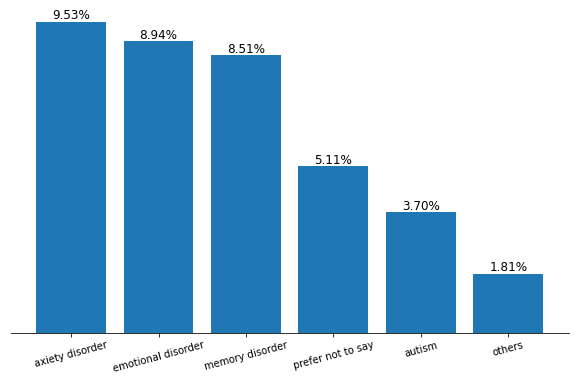

In [13]:
# plot the mental health disorders percentages among programmers
x = new_df['Disease'].iloc[1:]
y = new_df['Count_per'].iloc[1:]
plt.figure(figsize = [10,6])
plt.bar(x, height=y)
labels = ['axiety disorder', 'emotional disorder', 'memory disorder', 'prefer not to say', 'autism', 'others']
plt.xticks(ticks=x, labels = labels, rotation=15);
plt.ylim(0, 0.1);
plt.yticks(ticks=[]);

ticks = new_df['Count_per'].apply(lambda x: format(x, '.2%'))
for i in range(x.shape[0]): 
    plt.text(i, y[i+1]+0.004, ticks[i+1], ha = 'center', va='top', size=12)

ax = plt.gca()
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')
ax.spines.left.set_color('none')

### Analysis:

The most prevalent illness is anxiety disorder (9.53%), followed by emotional disorder (8.94%) and memory disorders (8.51%). 

Compared to the statistics from NAMI (National Alliance by the Mental), there are 8.4% American suffering from depression and 2.8% Bipolar. Both are recognized as common emotional disorders.

### Question 2. Is mental health correlated with employment?

In [21]:
# create a age-employment spreadsheet and calculate the average MH index for each grid
subset = ['Age', 'Employment', 'MH_dummy']
df_age_employ = df[subset].dropna(subset=subset, axis=0)
df_age_employ = df_age_employ.groupby(['Employment', 'Age']).mean()
df_age_employ.reset_index(inplace=True)
df_pivot_age_employ = df_age_employ.pivot(index='Employment', columns='Age', values='MH_dummy')
df_pivot_age_employ

Age,18-24,25-34,35-44,45-54,55-64,< 18,> 65,Prefer not to say
Employment,,,,,,,,
Employed full-time,0.742090,0.753330,0.753948,0.761817,0.776106,0.506024,0.858333,0.395973
Employed part-time,0.700555,0.698529,0.685185,0.607843,0.724138,0.602273,0.800000,0.500000
I prefer not to say,0.536000,0.483516,0.491228,0.416667,0.333333,0.613971,0.428571,0.416667
"Independent contractor, freelancer, or self-employed",0.695614,0.729750,0.759710,0.791398,0.803815,0.662651,0.783133,0.390244
"Not employed, and not looking for work",0.628000,0.543624,0.469136,0.520000,0.714286,0.720370,0.600000,0.486486
"Not employed, but looking for work",0.662876,0.606700,0.610687,0.577236,0.647059,0.674641,0.571429,0.473684
Retired,0.500000,0.428571,0.230769,0.611111,0.777778,0.600000,0.806452,0.000000
"Student, full-time",0.731359,0.654397,0.573333,0.500000,0.500000,0.708459,0.800000,0.524752
"Student, part-time",0.723282,0.618090,0.600000,0.583333,0.000000,0.711610,0.000000,0.458333


In [22]:
# rearrange the frame for better visualization
df_pivot_age_employ = df_pivot_age_employ[['< 18 ', '25-34 ', '35-44 ', '45-54 ', '55-64 ', '> 65 ',
       'Prefer not to say']]
df_pivot_age_employ = df_pivot_age_employ.reindex(['Employed full-time', 'Employed part-time', 
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work',
       'Not employed, but looking for work', 'Student, full-time',
       'Student, part-time', 'Retired', 'I prefer not to say'])
df_pivot_age_employ.replace(0, np.nan, inplace=True)

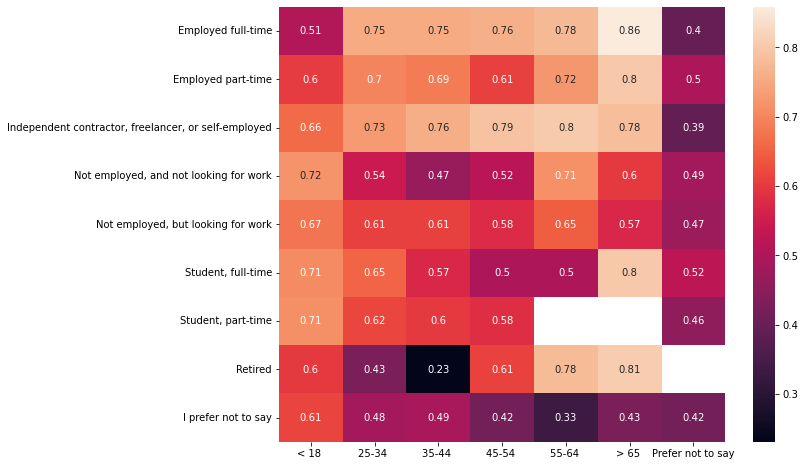

In [76]:
# plot the mental health index heatmap for each age-employment subgroup
plt.figure(figsize=(10,8))
g = sns.heatmap(df_pivot_age_employ, annot=True, annot_kws={"size": 10})
g.set(xlabel=None)
g.set(ylabel=None)
plt.show()

### Analysis:

* People who prefer not to say have the worest mental health state
* Employed people have a significantly better mental health state than all other groups:
 - even self-employed people are mentally healthier than unemployed people;
 - full time employed people are mentally healthier than part-time employed;
 - students' mental health are poorer than those employed as well.
 
* the elder is slightly mental healthier than the youth:
 - those who retired early have extremely poor mental health.


### Question 3: Is mental health correlated with salary?

### Assumption:
If salary is positively correlated to mental health, states with higher salary level would have an overall higher mental health index.

In [23]:
# calculate the average salary and health index for each state
subset = ['US_State', 'MH_dummy', 'CompTotal']
df_US = df[subset].dropna(subset=subset, axis=0)
df_US = df_US[df_US.CompTotal<10**7]
df_US_state = df_US.groupby('US_State').mean().sort_values('CompTotal',ascending=False)
df_US_state = df_US_state.drop('Puerto Rico')  # drop the outlier 'Puerto Rico' 
df_US_state

,MH_dummy,CompTotal
US_State,,
Nevada,0.636364,197294.318182
Washington,0.598071,183216.512862
California,0.677706,174860.294023
New York,0.650255,155790.609508
New Jersey,0.727273,153901.577540
District of Columbia,0.688525,149706.131148
Massachusetts,0.602532,139340.708861
South Dakota,0.681818,139114.863636
Wyoming,0.400000,138495.000000


In [24]:
# calculate the correlation, 0.16 implies no strong linear correlation
df_US_state.corr()

,MH_dummy,CompTotal
MH_dummy,1.000000,0.165701
CompTotal,0.165701,1.000000


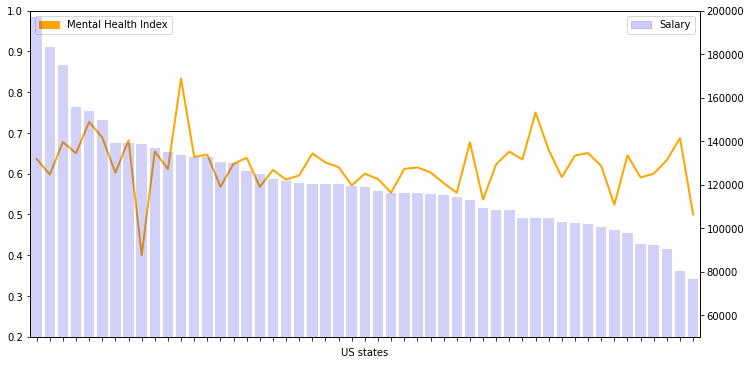

In [25]:
# combine the index line and salary histogram into one graph
import matplotlib.patches as mpatches
plt.figure(figsize=(12,6))

# plot line graph on axis #1
ax1 = sns.lineplot(
    x = df_US_state.index, 
    y = df_US_state['MH_dummy'], 
    data = df_US_state, 
    sort = False, 
    color ='orange',
    linewidth = 2,
    alpha = 1
)
# ax1.set_ylabel('average temp')
ax1.set_ylim(0.2, 1)
ax1.set(ylabel=None)
ax1.set(xticklabels=[])
ax1.set(xlabel='US states')
ax1_patch = mpatches.Patch(color='orange', label='Mental Health Index')
ax1.legend(handles=[ax1_patch], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar graph on axis #2
sns.barplot(
    x = df_US_state.index, 
    y = df_US_state['CompTotal'], 
    data = df_US_state, 
    color = 'blue', 
    alpha = 0.2, 
    ax = ax2       # Pre-existing axes for the plot
)
# ax2.grid(b=False) # turn off grid #2

ax2.set_ylim(50000, 200000)
ax2.set(ylabel=None)
ax2.set(xticklabels=[])
ax2_patch = mpatches.Patch(color='blue',  alpha = 0.2, label='Salary')
ax2.legend(handles=[ax2_patch], loc="upper right")

plt.show()

### Analysis:
* Although histograms are sorted in a descending order, the index line fluctuates violently, implying no significnat correlation between these two variables.
* the low correlation coefficient suggests no strong linear correaltion as well.


### Conclusion:
1. Mental illnesss are prevalent among programmers. Top three are anxiety disorder, emotional disorder and memory disorder.
2. Mental health is positively correlated with employment and age.
3. there is no solid evidence suggestions mental health is correlated with salary. 

## 5. Others

In [79]:
# explore the relationship between education and mental health
subset = ['EdLevel', 'MH_dummy']
df_edu = df[subset].dropna(subset=subset, axis=0)
df_edu.groupby('EdLevel').mean()

,MH_dummy
EdLevel,
"Associate degree (A.A., A.S., etc.)",0.636756
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0.750914
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0.797464
"Other doctoral degree (Ph.D., Ed.D., etc.)",0.782972
Primary/elementary school,0.670948
"Professional degree (JD, MD, etc.)",0.757469
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",0.691092
Some college/university study without earning a degree,0.654352
Something else,0.602941


### Analysis:
* People with higher education are generally more mentally healier.

In [80]:
# explore the relationship between mental health and countries
subset = ['Country', 'MH_dummy']
countries = df['Country'].value_counts().reset_index().query('Country>1000')['index']
df_country = df.loc[df['Country'].isin(countries), subset]
df_country = df_country.dropna(axis=0)
df_country.groupby('Country').mean().sort_values('MH_dummy', ascending=False)

,MH_dummy
Country,
India,0.832038
Italy,0.811418
Russian Federation,0.798405
Spain,0.790393
France,0.774336
Germany,0.747931
Sweden,0.743409
Poland,0.740214
Netherlands,0.696354


### Analysis:
* European programmer are mentally healither than North American programmers.
* India achieves highest mental health socre while the U.S. hit the lowest.